In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../TensorFlow_FILES/DATA/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


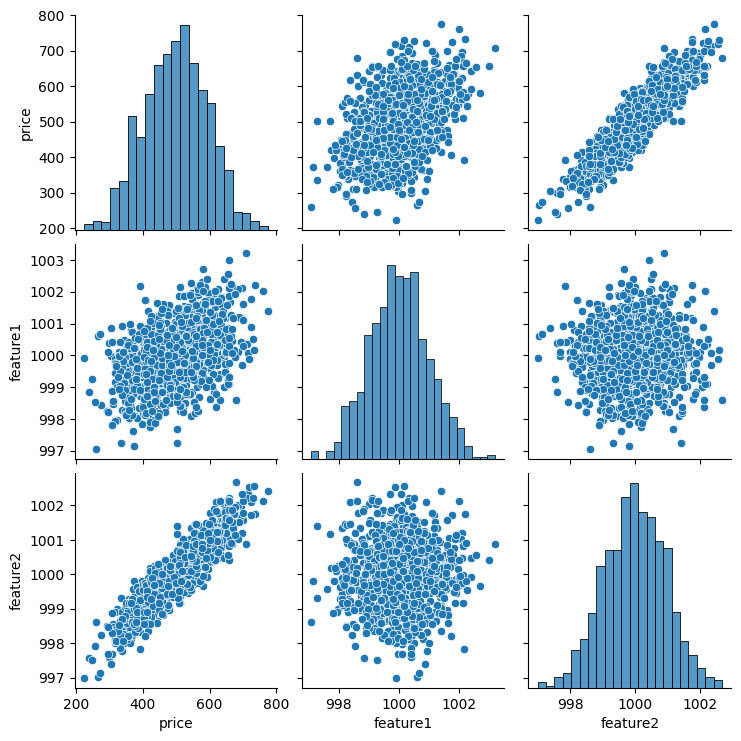

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1', 'feature2']].values 
#we pass numpy arrays for tensorflow
#So .values is attached to the end of a panda data frame or series

In [8]:
y = df['price'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train) # prevents data leakage to fit to x training data

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.max()

np.float64(1.0)

In [17]:
X_train.min()

np.float64(0.0)

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense

In [20]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |
 |  Examples:
 |
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |
 |  # When using the delayed-build pattern (no 

In [21]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])

In [24]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1)) #predicts the price

model.compile(optimizer='rmsprop', loss='mse') #regression task

#easier to modify and add or remove layers when using this way

In [25]:
model.fit(x=X_train, y=y_train, epochs=250) #epoch is how many times we go through the training data

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 256568.7031
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256396.3438 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256226.6094 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256045.3906
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255845.5156 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 255625.2344   
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255382.3125 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255116.3438 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254826.4219 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 254509.8125
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254164.4062 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253781.4844 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253363.0625 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [26]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

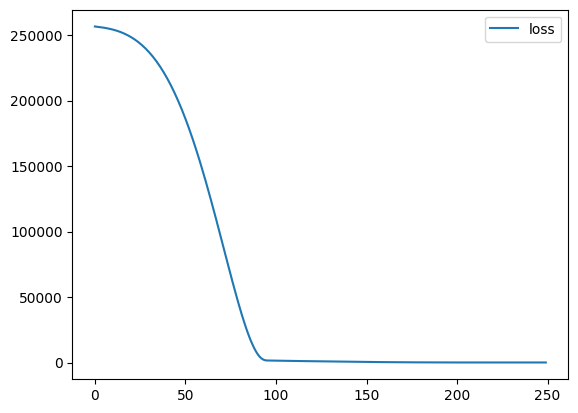

In [27]:
loss_df.plot()

In [28]:
model.evaluate(X_test, y_test, verbose=0)

25.755348205566406

In [29]:
model.evaluate(X_train, y_train, verbose=0)

25.517242431640625

In [30]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [31]:
test_predictions

array([[404.44455],
       [622.3326 ],
       [590.96246],
       [571.13696],
       [365.89816],
       [578.0552 ],
       [514.0864 ],
       [458.14874],
       [548.19293],
       [446.57516],
       [610.59674],
       [547.80035],
       [418.23663],
       [408.03336],
       [649.9238 ],
       [436.3835 ],
       [507.38443],
       [658.7179 ],
       [661.33496],
       [564.4018 ],
       [333.53256],
       [443.92712],
       [381.74283],
       [377.95114],
       [565.4871 ],
       [609.4397 ],
       [531.34436],
       [426.97195],
       [654.2218 ],
       [413.19742],
       [441.70526],
       [484.15045],
       [437.50986],
       [680.57336],
       [423.8398 ],
       [416.8472 ],
       [500.85544],
       [549.38464],
       [508.7637 ],
       [394.58823],
       [617.379  ],
       [415.74643],
       [603.26294],
       [445.00333],
       [500.98517],
       [580.5105 ],
       [667.6689 ],
       [489.39255],
       [317.84943],
       [484.4556 ],


In [35]:
test_predictions = pd.Series(test_predictions.reshape(300,))

AttributeError: 'Series' object has no attribute 'reshape'

In [36]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [37]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [38]:
pred_df.columns = ['Test true Y', 'Model Predictions']

In [39]:
pred_df 

,Test true Y,Model Predictions
0,402.296319,404.444550
1,624.156198,622.332581
2,582.455066,590.962463
3,578.588606,571.136963
4,371.224104,365.898163
...,...,...
295,525.704657,528.022522
296,502.909473,514.406067
297,612.727910,608.460571
298,417.569725,416.061005


<Axes: xlabel='Test true Y', ylabel='Model Predictions'>

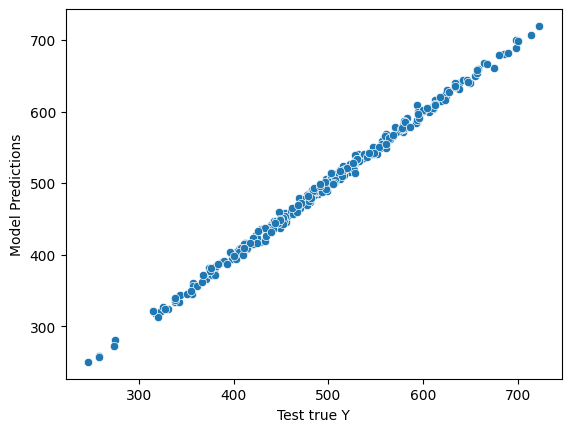

In [40]:
sns.scatterplot(x='Test true Y', y='Model Predictions', data=pred_df)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
mean_absolute_error(pred_df['Test true Y'], pred_df['Model Predictions'])

4.066832467072279

In [44]:
df.describe() #mean is 498 and mae is 4.06 which is less than 1% so the model is doing well.

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [45]:
mean_squared_error(pred_df['Test true Y'], pred_df['Model Predictions'])**0.5

5.0749732417569335

In [46]:
new_gem = [[998, 1000]]

In [47]:
new_gem = scaler.transform(new_gem)

In [48]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[418.8758]], dtype=float32)

In [49]:
from tensorflow.keras.models import load_model

In [52]:
model.save('my_gem_model.keras')

In [53]:
later_model = load_model('my_gem_model.keras')

In [54]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[418.8758]], dtype=float32)